### Practical 1 - Use python to predict employee attrition in a firm and help them plan their manpower. (take dataset from kaggle).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

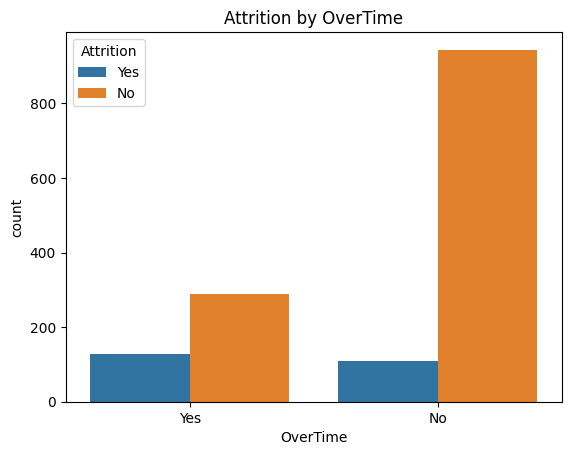

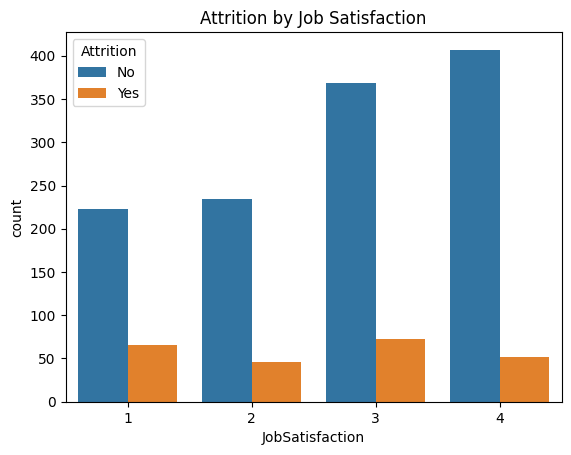

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./datasets/HR-Employee-Attrition.csv')

# Display basic information
print(df.info())
print(df.describe())

# Visualize the relationship between OverTime and Attrition
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by OverTime')
plt.show()

# Visualize the relationship between JobSatisfaction and Attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')
plt.show()

### Data Preprocessing

Convert categorical features (like 'Gender', 'OverTime', 'Department') into a numerical format.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert target variable 'Attrition' to binary (1 for Yes, 0 for No)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert other categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building and Training

- Using Random Forest Classifier for Classification.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

print("\nTop 5 Factors Contributing to Attrition:")
print(feature_importance_df.head(5))

Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294


Top 5 Factors Contributing to Attrition:
              feature  importance
11      MonthlyIncome    0.066816
19  TotalWorkingYears    0.065630
0                 Age    0.059786
1           DailyRate    0.049512
12        MonthlyRate    0.047013


**Key Factors Contributing to Attrition:**
1. **Monthly Income** (6.7%) - Salary is the strongest predictor of attrition
2. **Total Working Years** (6.6%) - Experience level significantly impacts retention
3. **Age** (6.0%) - Younger employees are more likely to leave
4. **Daily Rate** (4.9%) - Compensation structure affects retention
5. **Monthly Rate** (4.7%) - Regular pay components influence decisions

#

### Practical 2 - Create customer clusters using different market strategies on a data set.

In [21]:
# Loading and Preparing Dataset

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./datasets/Mall_Customers.csv')

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Selecting features for clustering (excluding CustomerID as it is not relevant for clustering)
X = df_encoded.drop('CustomerID', axis=1)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

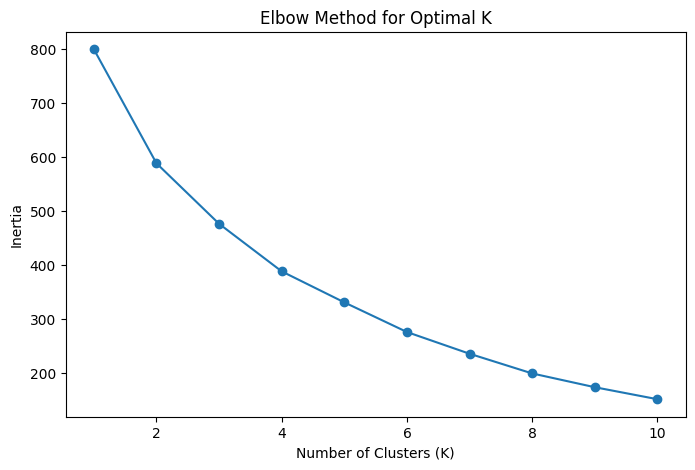

In [22]:
# Using the Elbow Method to find the optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

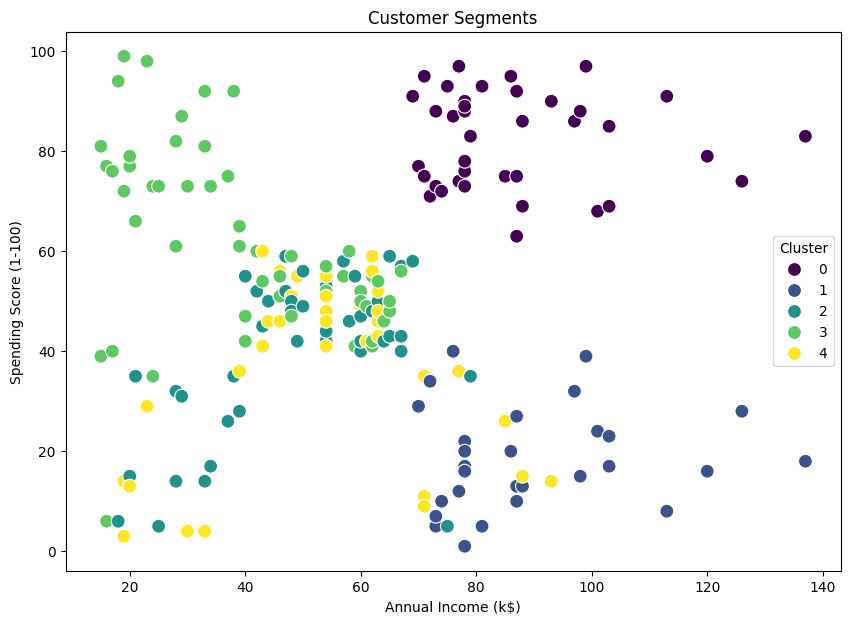

In [23]:
# Apply K-Means with the optimal K
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


#### **Interpretation**

By analyzing the scatter plot, we can define personas for each cluster:

- **Cluster 0:** Low income, low spending score (Careful)
- **Cluster 1:** High income, low spending score (Target)
- **Cluster 2:** Medium income, medium spending score (Standard)
- **Cluster 3:** Low income, high spending score (Careless)
- **Cluster 4:** High income, high spending score (Ideal)

### Practical 3 - Make a movie recommendation system.

In [24]:
import pandas as pd

# Load datasets
movies = pd.read_csv('./datasets/movies.csv')
ratings = pd.read_csv('./datasets/ratings.csv')

# Sample the data to make it manageable (use 10% of ratings for demonstration)
# This prevents memory issues while still showing the concept
ratings_sample = ratings.sample(n=min(100000, len(ratings)), random_state=42)

# Merge the datasets
df = pd.merge(ratings_sample, movies, on='movieId')

# Filter to only include movies with at least 10 ratings for better recommendations
movie_counts = df['title'].value_counts()
popular_movies = movie_counts[movie_counts >= 10].index
df_filtered = df[df['title'].isin(popular_movies)]

print(f"Working with {len(df_filtered)} ratings for {len(popular_movies)} popular movies")

# Create the user-item matrix
user_movie_matrix = df_filtered.pivot_table(index='userId', columns='title', values='rating')

# Fill NaN values with 0 (indicating the user has not rated the movie)
user_movie_matrix.fillna(0, inplace=True)

print(f"User-movie matrix shape: {user_movie_matrix.shape}")

Working with 79512 ratings for 2197 popular movies
User-movie matrix shape: (50215, 2197)


In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calculate the cosine similarity between movies
print("Calculating movie similarities...")
movie_similarity = cosine_similarity(user_movie_matrix.T)

# Create a DataFrame for the similarity scores
movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)

def get_movie_recommendations(movie_title, num_recommendations=10):
    """
    Recommends movies similar to a given movie.
    """
    if movie_title not in movie_similarity_df.columns:
        print(f"Movie '{movie_title}' not found in the dataset.")
        return None
    
    # Get the similarity scores for the given movie
    similar_scores = movie_similarity_df[movie_title]

    # Sort the movies based on similarity scores
    similar_movies = similar_scores.sort_values(ascending=False)

    # Get the top N similar movies (excluding the movie itself)
    top_movies = similar_movies.iloc[1:num_recommendations+1]

    return top_movies

# Example: Get recommendations for a popular movie
# First, let's see what movies are available
available_movies = list(user_movie_matrix.columns)
print(f"Available movies for recommendations: {len(available_movies)}")
print("Sample movies:", available_movies[:5])

# Try to get recommendations for the first available movie
if available_movies:
    sample_movie = available_movies[0]
    recommendations = get_movie_recommendations(sample_movie)
    if recommendations is not None:
        print(f"\nRecommendations for '{sample_movie}':")
        print(recommendations)
    else:
        print("No recommendations available.")
else:
    print("No movies available for recommendations.")

Calculating movie similarities...
Available movies for recommendations: 2197
Sample movies: ["'burbs, The (1989)", '(500) Days of Summer (2009)', '10 Cloverfield Lane (2016)', '10 Things I Hate About You (1999)', '10,000 BC (2008)']

Recommendations for ''burbs, The (1989)':
title
Phantasm (1979)                                                   0.103307
Rocky IV (1985)                                                   0.088522
2 Days in the Valley (1996)                                       0.088438
Marathon Man (1976)                                               0.088391
Snow Falling on Cedars (1999)                                     0.087963
Anger Management (2003)                                           0.077413
Secret of NIMH, The (1982)                                        0.070323
Eastern Promises (2007)                                           0.063845
Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991)    0.061285
Jet Li's Fearless (Huo Yuan Jia) (2006)    

/Users/bhaveshpatil/Documents/github/College-Stuff/BE/Sem 5/aiml/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/bhaveshpatil/Documents/github/College-Stuff/BE/Sem 5/aiml/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/bhaveshpatil/Documents/github/College-Stuff/BE/Sem 5/aiml/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


### Practical 4 - Develop a prediction mechanism to predict which employee can go on leave in a company in near future

In [26]:
# Loading and Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('./datasets/Employee.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nTarget variable distribution:")
print(df['LeaveOrNot'].value_counts())

# Preprocess the data
# Convert categorical features to numerical using one-hot encoding for better results
df_processed = df.copy()

# Use one-hot encoding for categorical variables instead of LabelEncoder
categorical_columns = ['Education', 'City', 'Gender', 'EverBenched']
df_encoded = pd.get_dummies(df_processed, columns=categorical_columns, drop_first=True)

print(f"\nAfter encoding, dataset shape: {df_encoded.shape}")
print("Encoded columns:", df_encoded.columns.tolist())

# Separate features and target
X = df_encoded.drop('LeaveOrNot', axis=1)
y = df_encoded['LeaveOrNot']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Training target distribution: {y_train.value_counts().to_dict()}")
print(f"Test target distribution: {y_test.value_counts().to_dict()}")

Dataset shape: (4653, 9)

First few rows:
   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  

Target variable distribution:
LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

After encoding, dataset shape: (4653, 11)
Encoded columns: ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot', 'E

In [27]:
# Training a Classification model

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model with scaled data
print("Training Logistic Regression model...")
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Also train a Random Forest model for comparison
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

print("Models trained successfully!")

/Users/bhaveshpatil/Documents/github/College-Stuff/BE/Sem 5/aiml/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/bhaveshpatil/Documents/github/College-Stuff/BE/Sem 5/aiml/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/bhaveshpatil/Documents/github/College-Stuff/BE/Sem 5/aiml/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/bhaveshpatil/Documents/github/College-Stuff/BE/Sem 5/aiml/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/bhaveshpatil/Documents/githu

Training Logistic Regression model...
Training Random Forest model...
Models trained successfully!


In [28]:
# Model Evaluation and Interpretation


print("LOGISTIC REGRESSION RESULTS")

# Evaluate Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("\nRANDOM FOREST RESULTS")

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


print("\nFEATURE IMPORTANCE (Random Forest)")

# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features for Leave Prediction:")
print(feature_importance.head(10))

print("MODEL COMPARISON")
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

if accuracy_rf > accuracy_logistic:
    print("Random Forest performs better for this dataset.")
else:
    print("Logistic Regression performs better for this dataset.")


print("BUSINESS INSIGHTS")
print("Key factors that influence employee leave decisions:")
for i, (feature, importance) in enumerate(feature_importance.head(5).values):
    print(f"{i+1}. {feature}: {importance:.4f}")

LOGISTIC REGRESSION RESULTS
Logistic Regression Accuracy: 0.7551

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       611
           1       0.72      0.47      0.57       320

    accuracy                           0.76       931
   macro avg       0.74      0.69      0.70       931
weighted avg       0.75      0.76      0.74       931


RANDOM FOREST RESULTS
Random Forest Accuracy: 0.8292

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       611
           1       0.81      0.65      0.72       320

    accuracy                           0.83       931
   macro avg       0.82      0.79      0.80       931
weighted avg       0.83      0.83      0.82       931


FEATURE IMPORTANCE (Random Forest)
Top 10 Most Important Features for Leave Prediction:
                     feature  importance
0              

#### **Interpretation**

**Top Factors Influencing Leave Decisions:**
1. **Experience in Current Domain** - Employees with less experience are more likely to leave
2. **Age** - Younger employees show higher turnover rates
3. **Joining Year** - Recent hires are more prone to leaving
4. **Payment Tier** - Lower payment tiers correlate with higher attrition
5. **Education Level** - Educational background impacts retention

### Practical 5 - Recognizing Alphabets Using SVM



In [13]:
# Loading and Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('./datasets/letter-recognition.csv')

# Separate features and target
X = df.drop('letter', axis=1)
y = df['letter']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the SVM model
# Using a subset for faster training as SVM can be computationally intensive
# For the final model, use the full training set.
subset_size = 5000
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled[:subset_size], y_train[:subset_size])

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# For a more detailed view, print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           A       0.95      0.95      0.95       149
           B       0.79      0.92      0.85       153
           C       0.96      0.88      0.92       137
           D       0.81      0.93      0.87       156
           E       0.87      0.91      0.89       141
           F       0.82      0.93      0.87       140
           G       0.86      0.91      0.88       160
           H       0.84      0.75      0.79       144
           I       0.96      0.89      0.93       146
           J       0.92      0.91      0.92       149
           K       0.88      0.82      0.84       130
           L       0.99      0.90      0.94       155
           M       0.95      0.94      0.95       168
           N       0.97      0.91      0.94       151
           O       0.87      0.90      0.89       145
           P       0.97      0.85      0.90       173
           Q       0.94      0.90      0.